<center><b>Ecole Polytechnique, Cycle Ingénieur (2A)<b></center>
<center>MAP471A - Problem solving en mathématiques appliquées</center>
<center>Enseignants : Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(mail)</a> 
    Teddy Pichard	<a href="mailto:teddy.pichard@polytechnique.edu">(mail)</a>
        </center>


In [209]:
# css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()

In [1]:
# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  
import random
from tqdm import tqdm
from typing import List
import pandas as pd
%matplotlib inline  

<a id="Prelim"></a>
# Aléatoire 1 : Apprentissage par renforcement

## Table des matières

- [1. Le problème du bandit](#bandit)
- [2. Apprentissage markovien : Pierre-Feuilles-Ciseaux](#PFC)
   * [L'algorithme d'apprentissage](#Apprentissage)
   * [1 joueur apprend](#Apprend_iid)
   * [2 joueurs apprennent](#Apprend_apprend)

L'objectif de ce TP est d'étudier de façon expérimentale deux problèmes simples qui se traitent naturellement par <i>Apprentissage par renforcement</i>. 

<a id="bandit"></a>
# 1. Le problème du bandit

Considérons le problème suivant : un annonceur a le choix d'afficher sur une page web une publicité choisie parmi $\{A,B\}$, l'annonceur est payé au clic et l'objectif est d'afficher la publicité la plus attractive.

On modélise le problème de la façon suivante : chaque utilisateur se comporte de façon indépendante des autres et clique sur la publicité $A$ (resp. $B$) avec probabilité $p_A$ (resp. $p_B$), on suppose que $p_A,p_B$ sont inconnues.

On note $E_i\in \{A,B\}$ la publicité affichée sur le site lorsque le $i$-ème client se connecte.
On pose $X_i=1$ si le $i$-ème client clique, $0$ sinon. On a donc
$$
X_i\sim \mathrm{Bernoulli}(p_{E_i}).
$$
La stratégie $E_i$ à l'instant $i$ est une fonction (éventuellement aléatoire) de $(E_1,X_1),\dots,(E_{i-1},X_{i-1})$.
On cherche à définir une stratégie efficace pour l'annonceur, c'est-à-dire qu'asymptotiquement on propose la meilleure publicité :
$$
\frac{X_1+\dots +X_n}{n} \stackrel{n\to +\infty}{\to} \max\{p_A,p_B\}
$$
(convergence presque-sûre ou en probabilité). Encore mieux : on souhaite maximiser les gains moyens à horizon fini
$$
\max_{(E_i)_i\text{ stratégies }}\mathbb{E}[X_1+\dots +X_n].
$$



### Une méthode sous-optimale : la $\varepsilon$-exploration
Considérons la stratégie suivante :
- On fixe un paramètre $\varepsilon>0$ "petit".
- On choisit $E_1=A,E_2=B$.
- Pour $i\geq 3$, on note $M_i$ la publicité qui a eu le meilleur "taux de clic" jusque-là (en cas d'ex-aequo entre $A,B$ on se donne une règle arbitraire)
   * Avec proba $1-\varepsilon$, on prend $E_i=M_i$,
   * Avec proba $\varepsilon$ on prend $E_i=\mathrm{non}(M_i)$.

<i>(<b>Vocabulaire :</b> On considère qu'avec probabilité $\varepsilon$ on "explore", alors qu'avec probabilité $1-\varepsilon$ on "exploite".)</i>



<div markdown=1 class="DoIt"> 

1. Intuitivement, quelle est la limite de $(X_1+\dots +X_n)/n$ ? Asymptotiquement (en $n$), quel semble être le meilleur choix pour $\varepsilon$?
2. On fixe $n=5000$, $p_A=0.4$, $p_B=0.6$, $\varepsilon=0.001$. Tracer 10 trajectoires du processus
$$
i\in \{1,\dots,n\} \mapsto \frac{1}{i}\left( X_1+\dots +X_i\right).
$$
Est-ce que les courbes sont compatibles avec votre intuition de la question précédente?
3. Pour $n=100$,  $p_A=0.4$, $p_B=0.6$, déterminer par simulation la valeur de $\varepsilon$ qui optimise $\mathbb{E}\left[X_1+\dots +X_n\right]$. (Prendre $10000$ simulations pour chaque valeur de $\varepsilon$.)

<div markdown=1 class="Answers"> 

On sait que $ \frac{(X_1 + \dots X_n)}{n} \rarr \mathbb{E[X_1]} = (1 - \varepsilon) \ min\{p_A, p_B \} + \varepsilon \ max \{ p_A, p_B \}$

Asymptotiquement en $n$, $\varepsilon_n \rarr 0 $ quand $n \rarr \infty$ 

In [90]:
# Question 2
p=[0.6, 0.4]
pA=p[0]
pB=p[1]
S=10 # Nombre de simulations
N=5000 # Durée d'une simulation
epsilon = 0.01


# Rappel : 
# np.random.rand()<p renvoie une Bernoulli de moyenne p

In [114]:
def simulate_epoch(p_true : List,
                   epsilon,
                   simulations_par_epoch):
    results = {
        0: {
            "mean": 0,
            "n":  0
        },
        1: {
            "mean": 0,
            "n": 0,
        }
    }

    l = []
    for n in range(simulations_par_epoch):
            if n == 0 :
                action = 0

            elif n == 1:
                action = 1

            else:
                p_pred = [results[0]["mean"], results[1]["mean"]]
                
                action = np.argmax(p_pred)
                if np.random.rand() < epsilon: #exploration
                    action = 1 - action
            
            X_i = np.random.rand() < p_true[action]
            l.append(X_i)

            results[action]["mean"] = (results[action]["mean"] * results[action]["n"] + X_i)/(results[action]["n"]+ 1)
            results[action]["n"] += 1

    return np.mean(l)

In [92]:
epochs = {}
results = {
    0: {
        "mean": 0,
        "n":  0
    },
    1: {
        "mean": 0,
        "n": 0,
    }
}

for n_sim in range(S):
    epochs[n_sim] = [0]
    for n in range(N):
        if n == 0 :
            action = 0

        elif n == 1:
            action = 1

        else:
            p_pred = [results[0]["mean"], results[1]["mean"]]
            
            action = np.argmax(p_pred)
            if np.random.rand() < epsilon: #exploration
                action = 1 - action
        
        X_i = np.random.rand() < p[action]

        results[action]["mean"] = (results[action]["mean"] * results[action]["n"] + X_i)/(results[action]["n"]+ 1)
        results[action]["n"] += 1

        epochs[n_sim].append(
            (epochs[n_sim][-1] * (n) + X_i)/(n+1)
        )

In [93]:
results

{0: {'mean': 0.598488980465833, 'n': 49503},
 1: {'mean': 0.38028169014084484, 'n': 497}}

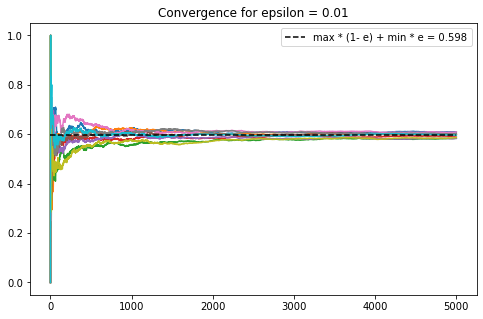

In [95]:
plt.figure(figsize=(8,5))
plt.title(f"Convergence for epsilon = {epsilon}")
for idx, result in epochs.items():
    plt.plot(result)
    
    

plt.hlines(
    np.max(p) * (1-epsilon) + np.min(p) * (epsilon),
    0,
    N,
    colors= "black",
    linestyles= "dashed",
    label = f"max * (1- e) + min * e = {np.max(p) * (1-epsilon) + np.min(p) * (epsilon)}"
)

plt.legend()
plt.show()

In [118]:

# Question 3 : 
p=[0.6, 0.4]
pA=p[0]
pB=p[1]
S=10000 # Nombre de simulations
N=100 # Durée d'une simulation
possible_epsilons =np.arange(0.05,0.20,0.015)

epsilon_results = {}

for epsilon in possible_epsilons:
    epsilon_results[epsilon] = 0
    for epoch in tqdm(range(S)):
        m = simulate_epoch(
            p,
            epsilon,
            N
        )
        epsilon_results[epsilon] = (epsilon_results[epsilon] * (epoch) + m ) / (epoch+1)


100%|██████████| 10000/10000 [00:09<00:00, 1064.26it/s]


In [119]:
epsilon_results

{0.05: 0.5620970000000093,
 0.065: 0.5612750000000089,
 0.08: 0.5590920000000082,
 0.095: 0.5576080000000149,
 0.11: 0.5572510000000104,
 0.125: 0.5547880000000099,
 0.14: 0.5540070000000085,
 0.155: 0.5530810000000139,
 0.16999999999999998: 0.5504890000000139,
 0.185: 0.5482080000000101,
 0.2: 0.5461560000000124}

<AxesSubplot:>

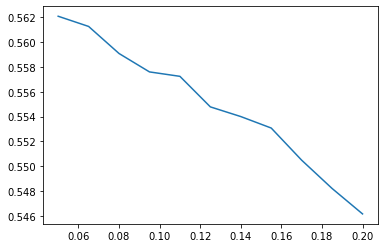

In [145]:
pd.Series(epsilon_results)\
    .plot()

In [57]:
possible_epsilons

array([0.05 , 0.065, 0.08 , 0.095, 0.11 , 0.125, 0.14 , 0.155, 0.17 ,
       0.185, 0.2  ])

## Une stratégie asymptotiquement optimale?

On fait maintenant varier la probabilité d'exploration. L'algorithme est le même que précédemment sauf qu'on remplace $\varepsilon$ par une suite
 $(\varepsilon_i)_{i\geq 3}$ d'éléments de $(0,1)$. On pourra essayer
-  $\varepsilon_i=1/i^2$
-  $\varepsilon_i=1/\sqrt{i}$
-  $\varepsilon_i=1/\log{i}$

<div markdown=1 class="DoIt"> 

Q1. On fixe à nouveau $n=1000$, $p_A=0.4$, $p_B=0.6$. Pour les exemples des 3 suites ci-dessus, tracer quelques trajectoires de courbes
$$
i\in \{1,\dots,n\} \mapsto \frac{1}{i}\left( X_1+\dots +X_i\right).
$$ 

In [206]:
####################################
# Question 1

p=[0.4, 0.6]
pA=p[0]
pB=p[1]
S=10 # Nombre de simulations
N=5000 # Durée d'une simulation


# changer method pour visualizer diferents fonctions
method = lambda x : 1/(x**2)



In [208]:
epochs = {}
results = {
    0: {
        "mean": 0,
        "n":  0
    },
    1: {
        "mean": 0,
        "n": 0,
    }
}
for epoch in range(S):
    epochs[epoch] = [0]
    for n in range(N):
        if n == 0 :
            action = 0

        elif n == 1:
            action = 1

        else:
            epsilon = method(n)
            p_pred = [results[0]["mean"], results[1]["mean"]]
            
            action = np.argmax(p_pred)
            if np.random.rand() < epsilon: #exploration
                action = 1 - action
        
        X_i = np.random.rand() < p[action]

        results[action]["mean"] = (results[action]["mean"] * results[action]["n"] + X_i)/(results[action]["n"]+ 1)
        results[action]["n"] += 1

        epochs[epoch].append(
            (epochs[epoch][-1] * (n) + X_i)/(n+1)
        )


explore
explore
explore
explore


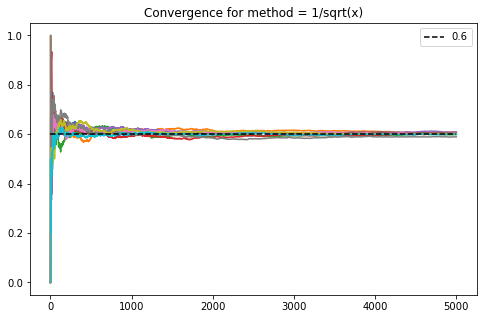

In [202]:
plt.figure(figsize=(8,5))
plt.title(f"Convergence for method = 1/sqrt(x)")
for idx, result in epochs.items():
    plt.plot(result)
    
    

plt.hlines(
    np.max(p),
    0,
    N,
    colors= "black",
    linestyles= "dashed",
    label = np.max(p)
)

plt.legend()
plt.show()

<div markdown=1 class="DoIt"> 

Q2. Que doit vérifier la suite $(\varepsilon_i)$ pour que l'on ait
$$
\frac{X_1+\dots +X_n}{n} \stackrel{n\to +\infty}{\to} \max\{p_A,p_B\}?
$$

<div markdown=1 class="Answers"> 

2. $ \varepsilon_n \rarr  0$ quand $n$ tends vers l'infini et $\sum \varepsilon_i = \infty $



<a id="PFC"></a>
# 2. Apprentissage markovien : Pierre-Feuille-Ciseaux

## Préliminaires et notations

On considère $2$ joueurs $X,Y$ qui jouent à <i>Pierre-Feuille-Ciseaux</i>. Pour $t\geq 1$ on note $X_t\in \{\text{Pi,Fe,Ci}\}$ le choix du joueur à l'instant $t$ et $Y_t$ le choix de son adversaire.

On appelera `Historique` la liste 
$$
[[X_1,Y_1],[X_2,Y_2],\dots, [X_T,Y_T]]
$$
des choix des joueurs jusqu'à l'instant actuel.

Dans la présentation on représentera aussi `Historique` schématiquement de la façon suivante :
<img src="figures/ListeHistorique.jpg" style="width:450px;"/>
désigne également la liste
$$
[[\mathrm{Pi},\mathrm{Fe}],[\mathrm{Ci},\mathrm{Fe}],\dots, [\mathrm{Pi},\mathrm{Fe}]]
$$
avec $T=7$.


On suppose que l'adversaire fait ses choix suivant une mémoire "courte" et une source d'aléa :
* $Y_1,Y_2$ sont arbitraires.
* pour tout $t\geq 2$, 
$$
Y_{t+1}=\phi\left(X_{t-1},X_t,Y_{t-1},Y_t,A_{t+1}\right),
$$
où
  * $\phi$ est une fonction déterministe $\{\text{Pi,Fe,Ci}\}^4\times[0,1] \to \{\text{Pi,Fe,Ci}\}$
  * $(A_t)$ est une suite de variables i.i.d. uniformes dans $[0,1]$.

Par exemple, la stratégie (assez efficace...) consistant à toujours tirer uniformément au hasard (indépendamment des choix précédents) correspond à
$$
\phi(X_{t-1},X_t,Y_{t-1},Y_t,A_{t+1}) = \mathrm{Pi}\times \mathbf{1}_{A_{t+1}<1/3}
+ \mathrm{Fe}\times \mathbf{1}_{1/3<A_{t+1}21/3} + \mathrm{Ci}\times \mathbf{1}_{2/3 < A_{t+1}}.
$$
alors que la stratégie (idiote) consistant à jouer ce que l'adversaire vient de jouer est
$$
\phi(X_{t-1},X_t,Y_{t-1},Y_t,A_{t+1}) = X_t.
$$


### Réponse à une stratégie

On introduit donc une fonction $(p,q,r)\mapsto \verb|ReponseStrategie|(p,q,r)\in [0,1]^3$ de la façon suivante :
<br><br>
$$
\verb|ReponseStrategie|(p,q,r)=\mathrm{argmax}_{(x,y,z)} \mathbb{E}[\text{Gain pour }X \text{ si $X$ tire selon } (x,y,z)\text{ et }Y\text{ tire selon }(p,q,r)].
$$
<br>

(Dans cette espérance on considère qu'un victoire vaut $1$ et une défaite $-1$.)<br><br>


Par exemple, vous pouvez vérifier que si $(p,q,r)=(0.01,0,0.99)$ alors cela signifie que $Y$ va jouer `Ci` presque à tous les coups et donc $X$ joue `Pi` : 
$$
\verb|ReponseStrategie|(0.01,0,0.99)=(1,0,0).
$$

<div markdown=1 class="DoIt"> 

Que vaut la fonction `ReponseStrategie()`? <i>(Indication : les calculs sont assez simples.)</i><br>
Implémenter la fonction `ReponseStrategie()`.

On sait que 

$$

\mathbb{E}[Gain \ pour \ X] = x (r- q) + y (p- r) + z (q - p)
$$

Et appellons $ a = argmax_{(x, y, z)} \mathbb{E}[Gain \ pour \ X] $

$$
\verb|ResponseStrategie| (p, q, r) = (\mathbf{1}_{x = a}, \mathbf{1}_{y = a}, \mathbf{1}_{z = a}) 
$$

In [8]:
def response_strategie(p,q,r):
    weights = np.array((r- q, p-r, q- p))
    a = np.argmax(weights)

    return np.array([int(a == 0), int(a==1), int(a== 2)])

In [9]:
r = 1/3 
p = 1/2
q = 1 -p - r

response_strategie(p,q,r)

array([0, 1, 0])

<center>
    <font size=+3 color='red'>!! La partie obligatoire (à rendre sur Moodle) s'arrête ici !!</font>
</center>

Pour commencer à coder une stratégie d'apprentissage on définit une fonction `Stats` qui en fonction d'un historique `Historique` donné et de `PasseRecent`=$[[X_{t-1},X_t],[Y_{t-1},Y_t]]$  renvoie le nombre de fois où le joueur $i$ ($i=0$ correspond au joueur $X$) a joué `'Pi'`, `'Fe'` ou `'Ci'`.

Par exemple, avec l'exemple précédent pour `Historique` et
```python
TestHistorique=[['Pi','Fe'],['Ci','Fe'],['Pi','Ci'],['Fe','Pi'],['Ci','Fe'],['Pi','Ci'],['Pi','Fe']]
TestPasse=[['Ci','Fe'],['Pi','Ci']]
```
on doit obtenir
```python
Stats(TestHistorique,TestPasse,1)
>[1, 1, 0]
```
car dans la situation de ce passé récent le joueur $1$ a joué $1$ fois `Pi` et une fois `Fe` :
<img src="figures/ListeHistorique_AvecPasseRecent.jpg" style="width:450px;"/>

<div markdown=1 class="DoIt"> 

Implémenter la fonction `Stats`.

<a id="Apprentissage"></a>

## L'algorithme d'apprentissage

On considère la stratégie suivante. Pour un paramètre $\varepsilon >0$ (petit),
* Si $t=1,2,3$ on tire au hasard uniformément entre Pi,Fe,Ci.
* Pour $t\geq 4$
    -  <b>avec probabilité $1-\varepsilon$ on "exploite"</b> : on renvoie $\verb|ReponseStrategie|(p,q,r)$ calculée sur les stats de $Y$ dans l'historique. Plus précisément
          * En notant $(X_{t-2}=x_{t-2},X_{t-1}=x_{t-1})$ et $(Y_{t-2}=y_{t-2},Y_{t-1}=y_{t-1})$, on regarde toutes les fois où $Y$ s'est retrouvé dans la situation $(X_{s-2}=x_{t-2},X_{s-1}=x_{t-1})$ et $(Y_{s-2}=y_{t-2},Y_{s-1}=y_{t-1})$. On calcule alors les fréquences $\hat{p},\hat{q},\hat{r}$ avec lesquelles $Y$ a joué Pi-Fe-Ci.
          * On renvoie $\verb|ReponseStrategie|(\hat{p},\hat{q},\hat{r})$
    - <b>avec probabilité $\varepsilon$ on "explore"</b> : on tire au sort uniformément au hasard entre Pi,Fe,Ci.

### Tirages indépendants

<div markdown=1 class="DoIt"> 

Ecrire une fonction `TiragePiFeCi(p,q,r)` qui renvoie Pi,Fe,Ci avec les probabilités $p,q,r$.

<div markdown=1 class="DoIt"> 

Ecrire une fonction
```python
JoueurApprentissage(Historique,eps)
```
qui en fonction de l'historique et du paramètre $\varepsilon$ renvoie le coup de $X$ suivant l'algorithme d'apprentissage ci-dessus.


<a id="Apprend_iid"></a>
## $X$ apprend / $Y$ joue i.i.d.

On va jouer une partie de longueur $T$ entre $X$ (qui apprend) et $Y$ (qui joue de façon indé.)

<div markdown=1 class="DoIt"> 

Faire jouer $X$ selon l'algorithme d'apprentissage face à $Y$ qui joue des coups i.i.d. de probabilités $(0.6,0.2,0.2)$. Tracer l'évolution des proportions des coups joués par $X$.

<a id="Apprend_apprend"></a>
## $X$ apprend / $Y$ apprend

<div markdown=1 class="DoIt"> 

Faire jouer $X$ et $Y$ m'un contre l'autre,  chacun suivant selon l'algorithme d'apprentissage. Tracer l'évolution des proportions des coups joués par $X$.